# MODULE #1

In this module you will:
- Connect the Arduino device to the python notebook
- Collect accelerometer data from the Arduino Device
- Analyze how different movements impact the acceleromter signals

    
    

## SET UP: Run the 3 code boxes below to get started

In [ ]:
!pip install pyserial
!pip install hvplot
!pip install streamz
!pip install pandas
!pip install datetime
!pip install matplotlib
!pip install numpy

/bin/sh: line 1: pip: command not found
/bin/sh: line 1: pip: command not found
/bin/sh: line 1: pip: command not found
/bin/sh: line 1: pip: command not found
/bin/sh: line 1: pip: command not found
/bin/sh: line 1: pip: command not found
/bin/sh: line 1: pip: command not found


In [16]:
from serial import Serial
import serial.tools.list_ports
import hvplot.streamz
from streamz.dataframe import DataFrame
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import seaborn as sns

In [2]:
buffer_size = 4 # update every 0.5 seconds 

def unpack_serial_line(line, expected_entries, sep='\t'):
    line = line.decode("utf-8").strip()
    entries = line.split(sep)
    if len(entries) != len(expected_entries):
        print(f"Skipping line: {line}.\n Incorrect number of entries, "
              f"expected {len(expected_entries)}, found {len(entries)}.")
        return False
    for i, entry in enumerate(entries):
        try:
            entries[i] = float(entry)
        except ValueError as e:
            print(f"Skipping line: {line}.\n {e}.")
            return False
    return entries


# STEP 1: Set up your Arduino

---


## Remember- We learned that sensors convert a physical quantity (movement) into an electrical signal.





In [3]:
#Connect the Arduino Nano 33 IoT to your computer.  
# list available com ports, choose one in the next cell
print('Available Serial Ports:')
ports = []
for i, port in enumerate(serial.tools.list_ports.comports()):
    ports.append(port.device)
    print(f"({i})\tport={port.device}  description={port.description}")

Available Serial Ports:
(0)	port=/dev/cu.Bluetooth-Incoming-Port  description=n/a
(1)	port=/dev/cu.usbmodem141301  description=Arduino NANO 33 IoT


In [4]:
# Set this to the correct port index based on what is printed above
arduino_port = ports[1]
arduino_baudrate = 115200

In [43]:
#Connect the Arduino Nano 33 IoT to your computer.  
port = Serial(port=arduino_port, baudrate=arduino_baudrate)
port.flushInput()
port.flushOutput()
# Possible errors: 
# "Resource busy": close the serial window in the Arduino IDE and try again

## STEP 2: Let's use our Arduino to measure acceleration and visualize those electrical signals. 


---



*   Rest the Arduino device on the table and collect ~ 10 sec of data
*   What do the signals look like?
*   What would happen if we move the device around?


In [38]:
cols = ['t','x','y','z']
df_example = pd.DataFrame(columns=cols)
df = DataFrame(example=df_example)
df.hvplot(x='t', backlog=50, kind='scatter') * df.hvplot(x='t', backlog=50, kind='line')

:DynamicMap   []
   :Overlay
      .NdOverlay.I  :NdOverlay   [Variable]
         :Scatter   [t]   (value)
      .NdOverlay.II :NdOverlay   [Variable]
         :Curve   [t]   (value)

In [39]:
#for i in range(30): # Option 2: read 30 samples and then stop
while(True): #stream forever.  must use "Kernel" --> "Interrupt" to stop
    buffer = []
    for i in range(buffer_size):
        entries = unpack_serial_line(port.readline(), cols)
        if entries:
            buffer.append(entries)
    df_buffer = pd.DataFrame(buffer, columns=cols)
    df_buffer["t"] /= 1000.# convert from milliseconds to seconds
    df.emit(df_buffer)


Skipping line: 634635	-0.08		-0.07	-0.45	-0.90.
 Incorrect number of entries, expected 4, found 6.


KeyboardInterrupt: 

## STEP 3: Collecting motion data using the Arduino Acceleromoter

## Let's move our accelerometer up and down, in a single plane: 5 times

---
Tips:

*   Hold the accelerometer in two hands, as steady as possible
*   Do you best to only move the device up and down, no side to side or forward, backward motion


---




Which line shows the greatest amount of motion?










In [44]:
cols = ['t','x','y','z']
df_example = pd.DataFrame(columns=cols)
df = DataFrame(example=df_example)
df.hvplot(x='t', backlog=50, kind='scatter') * df.hvplot(x='t', backlog=50, kind='line')

:DynamicMap   []
   :Overlay
      .NdOverlay.I  :NdOverlay   [Variable]
         :Scatter   [t]   (value)
      .NdOverlay.II :NdOverlay   [Variable]
         :Curve   [t]   (value)

In [45]:
#for i in range(30): # Option 2: read 30 samples and then stop
while(True): #stream forever.  must use "Kernel" --> "Interrupt" to stop
    buffer = []
    for i in range(buffer_size):
        entries = unpack_serial_line(port.readline(), cols)
        if entries:
            buffer.append(entries)
    df_buffer = pd.DataFrame(buffer, columns=cols)
    df_buffer["t"] /= 1000.# convert from milliseconds to seconds
    df.emit(df_buffer)

Skipping line: Accelerometer sample rate = 104.00 Hz.
 Incorrect number of entries, expected 4, found 1.
Skipping line: .
 Incorrect number of entries, expected 4, found 1.
Skipping line: Acceleration in G's.
 Incorrect number of entries, expected 4, found 1.
Skipping line: X	Y	Z.
 Incorrect number of entries, expected 4, found 3.


KeyboardInterrupt: 

## Let's move our accelerometer forward and back (short side facing forward), in a single plane: 5 times

Which line shows the greatest amount of motion?

In [ ]:
df.hvplot(x='t', backlog=50, kind='scatter') * df.hvplot(x='t', backlog=50, kind='line')

In [ ]:
#for i in range(30): # Option 2: read 30 samples and then stop
while(True): #stream forever.  must use "Kernel" --> "Interrupt" to stop
    buffer = []
    for i in range(buffer_size):
        entries = unpack_serial_line(port.readline(), cols)
        if entries:
            buffer.append(entries)
    df_buffer = pd.DataFrame(buffer, columns=cols)
    df_buffer["t"] /= 1000.# convert from milliseconds to seconds
    df.emit(df_buffer)

## Let's move our accelerometer side to side (short side facing forward), in a single plane: 5 times

Which line shows the greatest amount of motion?

In [ ]:
df.hvplot(x='t', backlog=50, kind='scatter') * df.hvplot(x='t', backlog=50, kind='line')

In [ ]:
#for i in range(30): # Option 2: read 30 samples and then stop
while(True): #stream forever.  must use "Kernel" --> "Interrupt" to stop
    buffer = []
    for i in range(buffer_size):
        entries = unpack_serial_line(port.readline(), cols)
        if entries:
            buffer.append(entries)
    df_buffer = pd.DataFrame(buffer, columns=cols)
    df_buffer["t"] /= 1000.# convert from milliseconds to seconds
    df.emit(df_buffer)

## We learned that acceleration is velocity over time. What do we think would happen to the signals if we increased the speed of how fast we were moving?

Collect some data to see if you're right!

In [ ]:
df.hvplot(x='t', backlog=50, kind='scatter') * df.hvplot(x='t', backlog=50, kind='line')

In [ ]:
#for i in range(30): # Option 2: read 30 samples and then stop
while(True): #stream forever.  must use "Kernel" --> "Interrupt" to stop
    buffer = []
    for i in range(buffer_size):
        entries = unpack_serial_line(port.readline(), cols)
        if entries:
            buffer.append(entries)
    df_buffer = pd.DataFrame(buffer, columns=cols)
    df_buffer["t"] /= 1000.# convert from milliseconds to seconds
    df.emit(df_buffer)

## We learned that we collect acceleration in 3 axes: 

Let's orient our device so that when it collects data we're moving in the right direction
(hold the Arduino device upright so the acceleromter is on the top and cord is going away from you)

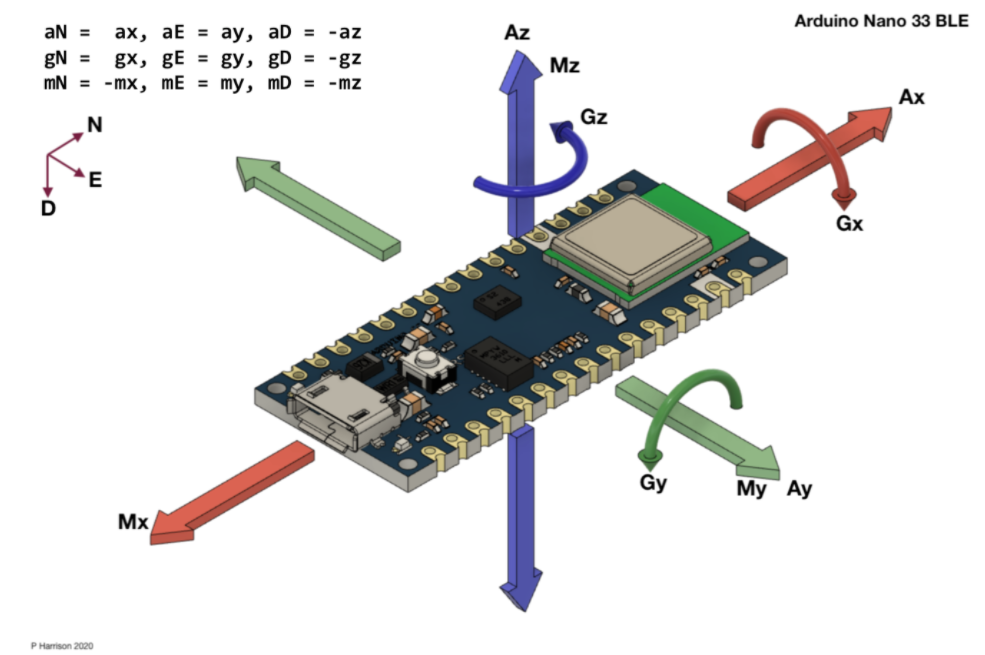

# STEP 4: Collect complex movements

## What does acceleration look like when stepping?

*   Stand up (be mindful of the USB cable length)
*   Hold your arduino in your right hand
*   Standing in place: take 10 steps, **with** an arm swing


Finished: Stepping with an Arm Swing
Collected 200 samples in 25.33015513420105 seconds.
Saved csv file: Stepping with an Arm Swing.csv


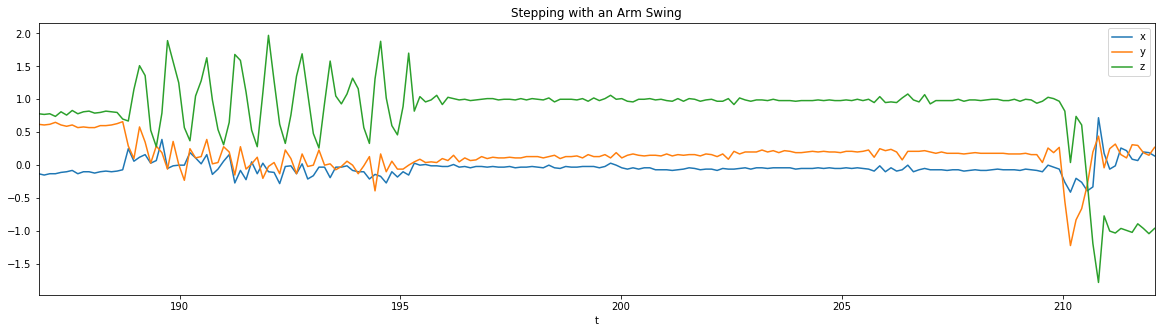

,x,y,z
t,,,
186.807,-0.13,0.62,0.78
186.934,-0.15,0.61,0.77
187.061,-0.13,0.62,0.78
187.188,-0.13,0.65,0.74
187.315,-0.11,0.61,0.81
187.442,-0.10,0.59,0.76
187.569,-0.08,0.61,0.83
187.696,-0.13,0.57,0.78
187.823,-0.10,0.58,0.81


In [49]:
trial_name = 'Stepping with an Arm Swing'
num_samples = 100 # ~10-15 seconds
expected_cols = ['t','x','y','z']

# Note on collecting data:
# unplug / plug in arduino, or press reset button to reset buffer for each data trial
port = Serial(port=arduino_port, baudrate=arduino_baudrate)
port.flushInput()
port.flushOutput()

# Read data
t0 = time.time()
data = []
for n in range(num_samples): 
    entries = unpack_serial_line(port.readline(), expected_cols)
    if entries:
        data.append(entries)
print(f"Finished: {trial_name}\n"
      f"Collected {len(data)} samples in {time.time() - t0} seconds.")

# Convert raw data to dataframe, save as csv and plot
data = pd.DataFrame(data, columns=expected_cols)
data["t"] /= 1000.# convert from milliseconds to seconds
data = data.set_index('t')
csv_filename = f"{trial_name}.csv"
#data.to_csv(csv_filename)
print(f"Saved csv file: {csv_filename}")
data.plot(figsize=(20, 5), title=trial_name)
plt.show()
data

## What can we observe? 

*   Can we see 10 peaks in the signal? Why do we think that is?
*   Which of the 3 axes are the most pronounced? Why do we think that is? 




## What if we did not swing our arms?

*   Standing in place: take 10 steps, **without** an arm swing
*   Save the data as a .csv





In [ ]:
trial_name = 'Steppung without an Arm Swing'
data_folder = 'test_data/'
num_samples = 200 # ~10-15 seconds
expected_cols = ['t','x','y','z']

# Note on collecting data:
# unplug / plug in arduino, or press reset button to reset buffer for each data trial
port = Serial(port=arduino_port, baudrate=arduino_baudrate)
port.flushInput()
port.flushOutput()

# Read data
t0 = time.time()
data = []
for n in range(num_samples): 
    entries = unpack_serial_line(port.readline(), expected_cols)
    if entries:
        data.append(entries)
print(f"Finished: {trial_name}\n"
      f"Collected {len(data)} samples in {time.time() - t0} seconds.")

# Convert raw data to dataframe, save as csv and plot
data = pd.DataFrame(data, columns=expected_cols)
data["t"] /= 1000.# convert from milliseconds to seconds
data = data.set_index('t')
csv_filename = f"{trial_name}.csv"
#data.to_csv(csv_filename)
print(f"Saved csv file: {csv_filename}")
data.plot(figsize=(20, 5), title=trial_name)
plt.show()
data


## What can we observe?

*   Can we see 10 peaks in the signal?
*   How is this signal different? Why do you think that is?

## What changes can we anticipate if we change the speed of our steps?

*   Standing in place: take 10 **fast** steps, **with** an arm swing

In [ ]:
trial_name = '10 fast steps'
data_folder = 'test_data/'
num_samples = 200 # ~10-15 seconds
expected_cols = ['t','x','y','z']

# Note on collecting data:
# unplug / plug in arduino, or press reset button to reset buffer for each data trial
port = Serial(port=arduino_port, baudrate=arduino_baudrate)
port.flushInput()
port.flushOutput()

# Read data
t0 = time.time()
data = []
for n in range(num_samples): 
    entries = unpack_serial_line(port.readline(), expected_cols)
    if entries:
        data.append(entries)
print(f"Finished: {trial_name}\n"
      f"Collected {len(data)} samples in {time.time() - t0} seconds.")

# Convert raw data to dataframe, save as csv and plot
data = pd.DataFrame(data, columns=expected_cols)
data["t"] /= 1000.# convert from milliseconds to seconds
data = data.set_index('t')
csv_filename = f"{trial_name}.csv"
#data.to_csv(csv_filename)
print(f"Saved csv file: {csv_filename}")
data.plot(figsize=(20, 5), title=trial_name)
plt.show()
data

## What is different in the signal when the steps are faster?

*   What do you notice about the height of the peaks?
*   What do you notice about the spacing of the peaks?

# WRAP UP: We saw that it's easier to detect steps in certain conditions over others. 

*   What could make it even easier to pick up steps using an accelerometer?
*   What kind of motions would make it harder to see steps?
* What characteristics of these signals could you use to identify when steps occur?

## EXTRA CREDIT: What kind of movement do you think could generate this plot?

Text(0,0.5,'Acceleration (m/sec^2)')

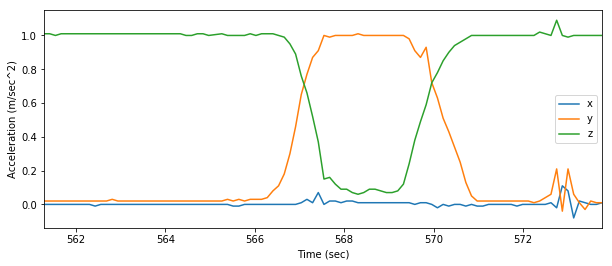

In [9]:
data = pd.read_csv('challenge.csv')

#plot accelerometer data in all 3 directions
data.plot(x='t', figsize=(10,4))
plt.xlabel('Time (sec)'), 
plt.ylabel('Acceleration')

# MODULE #2


---



# Acceleration: Calculating the Magnitude 

## STEP 1: Load data to visualize the signals

In this module you will:
- Learn how to analyze the signals you have collected from your Arduino accelerometer
- Understand what an algorithm is and how to change it
- Write a code to count the number of steps taken from the signals.
    
    
    
    

In [50]:
data = pd.read_csv('marching_in_place_left_pocket_10_steps.csv')

In [51]:
data.head()

,t,x,y,z
0,1.891,0.90,0.05,0.06
1,2.018,0.99,0.03,-0.01
2,2.145,0.98,0.07,0.01
3,2.272,0.96,0.05,-0.03
4,2.399,0.96,-0.02,0.01


Text(0,0.5,'Acceleration')

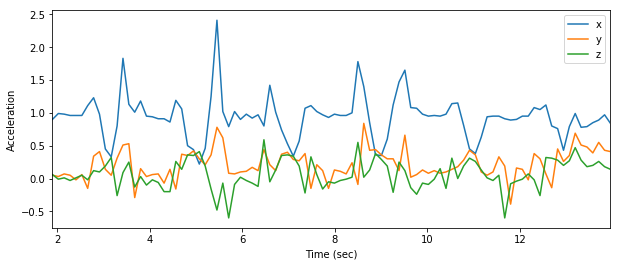

In [52]:
#plot accelerometer data in all 3 direction
data.plot(x='t', figsize=(10,4))
plt.xlabel('Time (sec)')
plt.ylabel('Acceleration')


# STEP 2: Lets make this less complicated by looking at 1 combo signal (1 line rather than 3). 
Above we see the accelerometer signals in 3 directions or 3 axes (x, y, and z).

It's easier to work with a single signal than all 3 at once so....
- We can sum the 3 signals from each axis to get one combined signal! 
- We do this using the following formula:
$magnitude = \sqrt{(x^2 + y^2 + z^2)}$ 

- The resultant combined signal is call Magnitude.


[Just an FYI- In Python, you can use `math` or `numpy` library to calculate the squre root.]




In [20]:
import numpy as np

m = data['x']**2 + data['y']**2 + data['z']**2
magnitude = np.sqrt(m)
data['magnitude'] = magnitude
data.head()

,t,x,y,z,magnitude
0,1.891,0.90,0.05,0.06,0.903383
1,2.018,0.99,0.03,-0.01,0.990505
2,2.145,0.98,0.07,0.01,0.982548
3,2.272,0.96,0.05,-0.03,0.961769
4,2.399,0.96,-0.02,0.01,0.960260


# STEP 3: Plot the magnitude to look at the new combined acceleration signal
- For each point in time, you will have a value that is the combination of the acceleration in all 3 directions.


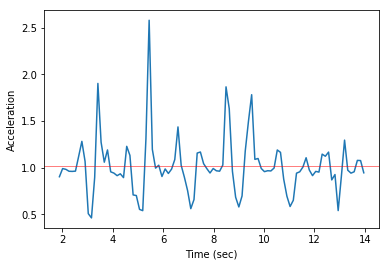

In [24]:
sns.lineplot(x='t', y='magnitude', data=data)
plt.xlabel('Time (sec)'), 
plt.ylabel('Acceleration')


plt.axhline(data['magnitude'].mean(), color='r', linewidth=.5)

# STEP 4: Center your magnitude data around 0

- What is a mean? 
(The mean of the signal is shown in red in the plot above.) 
- Note that it the signal is not centered around zero. This shift can be due to gravity. 
- We will subtract the mean of the magnitude signal to shift the magnitude signal to center around *0*.


In [22]:
data['magnitude_zerod'] = data['magnitude'] - data['magnitude'].mean()
data.head()

,t,x,y,z,magnitude,magnitude_zerod
0,1.891,0.90,0.05,0.06,0.903383,-0.112024
1,2.018,0.99,0.03,-0.01,0.990505,-0.024902
2,2.145,0.98,0.07,0.01,0.982548,-0.032859
3,2.272,0.96,0.05,-0.03,0.961769,-0.053637
4,2.399,0.96,-0.02,0.01,0.960260,-0.055146


## Lets look at the data 
- What is different in your magnitude_zerod column in your data table above?
- Does this surprise you?

## Plot the data below to see how the plot has changed
- How is the plot diffferent than the one in Step 2?

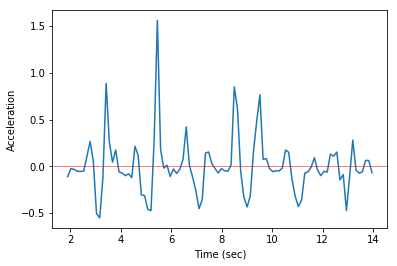

In [23]:
sns.lineplot(x='t', y='magnitude_zerod', data=data)
plt.xlabel('Time (sec)'), 
plt.ylabel('Acceleration')


plt.axhline(data['magnitude_zerod'].mean(), color='r', linewidth=.5)

# STEP 5: Use an Algorithm: Find Peaks in the signal to count the steps


- We will start with pre-defined function (called `find_peaks`) that already does basic calculations to find signal peaks.
- This is a quick and reliable way to get startedon a step counting algorithm.


We get `find_peaks` from the Scipy 's signal library. Scipy is a versatile library for signal processing and statistical analysis. 
- Pro tip: Check out the documentations for each tool to learn what parameters it has does and how to use the function correctly. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)

In [27]:
from scipy.signal import find_peaks

The `find_peaks` function can detect peaks by taking a one signal (i.e. the magnitude signal you just calculated) and finds all the local maximas. 
- It finds these local maxima by comparing value of each point with value of its neighbors. 
- The output is an index of where points are detected as peaks.
- Give it a try below:

Text(0,0.5,'Relative Acceleration (m/sec^2)')

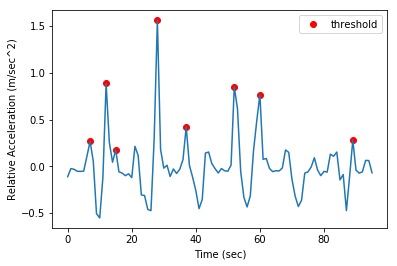

In [29]:
peaks_threshold, _ = find_peaks(data['magnitude_zerod'], threshold=.1)
plt.plot(peaks_threshold, data['magnitude_zerod'].loc[peaks_threshold], 'or')
plt.plot(data['magnitude_zerod'])
plt.legend(['threshold'])

plt.xlabel('Time (sec)'), 
plt.ylabel('Relative Acceleration')

You'll notice the peaks are marked off in red. 
We have control of how those peaks are identified using different parameters. 
In the example above, we are modifying the `threshold` parameter to help the algorithm pick off peaks.

### Threshold:
 - This is the vertical distance of a point away from it's neighbors.  

Let's modify the threshold and see how it changes which peaks are selected:

Text(0,0.5,'Relative Acceleration (m/sec^2)')

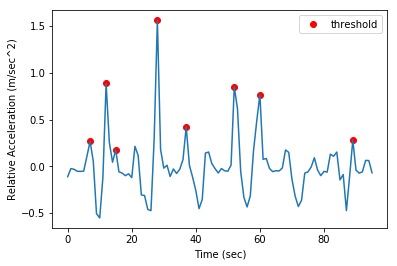

In [30]:
x = .1
peaks_threshold, _ = find_peaks(data['magnitude_zerod'], threshold=x)
plt.plot(peaks_threshold, data['magnitude_zerod'].loc[peaks_threshold], 'or')
plt.plot(data['magnitude_zerod'])
plt.legend(['threshold'])

plt.xlabel('Time (sec)'), 
plt.ylabel('Relative Acceleration')

# STEP 6: How to improve the algorithm to get an accurate step count
- This function also allows users to specify conditions for a peak’s properties. Let's examine these properties.



### Distance

- Distance is another property to adjust based onthe distance of neighboring peaks.
- You set a number for the required minimal horizontal distance (>= 1) in samples between neighbouring peaks. `distance = #`
- Smaller peaks are removed first until the condition is fulfilled for all remaining peaks.

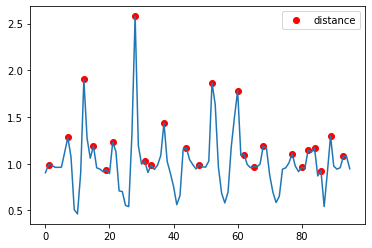

In [ ]:
peaks_distance, _ = find_peaks(data['magnitude'], distance=1)
plt.plot(peaks_distance, data['magnitude'].loc[peaks_distance], 'or')
plt.plot(data['magnitude'])
plt.legend(['distance'])

- How does `distance` parameter changes the outcome?
- How do you change the `distance` parameter to detect only the major peaks?  

### Width

- Width is another property to adjust based onthe width of the peaks.
- You set a number for the required minimal width each peak must have. `width = #`


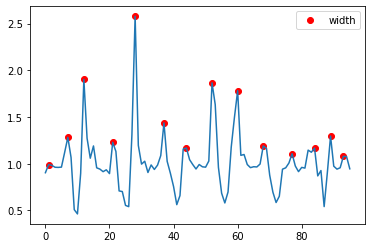

In [ ]:
peaks_width, _ = find_peaks(data['magnitude'], width=1)
plt.plot(peaks_width, data['magnitude'].loc[peaks_width], 'or')
plt.plot(data['magnitude'])
plt.legend(['width'])

- How does `width` parameter changes the outcome?
- How do you change the `width` parameter to detect fewer peaks?  


# STEP 7: Putting it all together

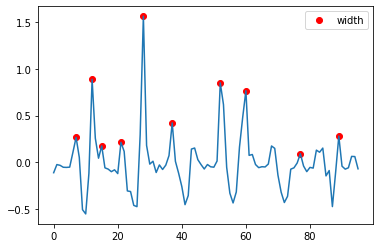

In [ ]:
peaks_all, _ = find_peaks(data['magnitude_zerod'], width=.4, distance=1, threshold=0.06, height=.08)
plt.plot(peaks_all, data['magnitude_zerod'].loc[peaks_all], 'or')
plt.plot(data['magnitude_zerod'])
plt.legend(['width'])

- Now try to change each of the parameter and see how the results change.
- Are these results more stable?


# STEP 8: Your turn

Now generate different step signals with your Arduino. Try a fast walk, slow walk and an energetic walk and see how each of the peak finding paramters change in each case.


Load the data you just recorded and then tune the peak-finding parameters you just learned until you're happy with how well it detects the activity. 
- distance, threshold, and width are already in the code for you to experiment with.
- Don't feel like you need to use all of them.

Pro tip: Think carefully about what you're seeing in the recorded data. 
- How far apart are the peaks? What's the value of the peaks? 
- Are there other peaks that you don't want to detect?

Skipping line: -0.08	-0.46	-0.88.
 Incorrect number of entries, expected 4, found 3.
Finished: activity
Collected 199 samples in 0.03699803352355957 seconds.
Saved csv file: activity.csv


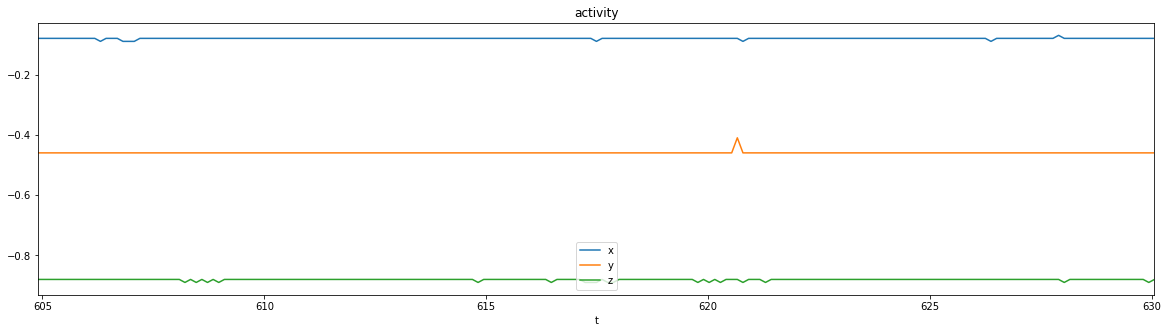

,x,y,z
t,,,
604.910,-0.08,-0.46,-0.88
605.037,-0.08,-0.46,-0.88
605.164,-0.08,-0.46,-0.88
605.291,-0.08,-0.46,-0.88
605.418,-0.08,-0.46,-0.88
605.545,-0.08,-0.46,-0.88
605.672,-0.08,-0.46,-0.88
605.799,-0.08,-0.46,-0.88
605.926,-0.08,-0.46,-0.88


In [31]:
trial_name = 'activity'
num_samples = 200 # ~10-15 seconds
expected_cols = ['t','x','y','z']

# Note on collecting data:
# unplug / plug in arduino, or press reset button to reset buffer for each data trial
port = Serial(port=arduino_port, baudrate=arduino_baudrate)
port.flushInput()
port.flushOutput()

# Read data
t0 = time.time()
data = []
for n in range(num_samples): 
    entries = unpack_serial_line(port.readline(), expected_cols)
    if entries:
        data.append(entries)
print(f"Finished: {trial_name}\n"
      f"Collected {len(data)} samples in {time.time() - t0} seconds.")

# Convert raw data to dataframe, save as csv and plot
data = pd.DataFrame(data, columns=expected_cols)
data["t"] /= 1000.# convert from milliseconds to seconds
data = data.set_index('t')
csv_filename = f"{trial_name}.csv"
data.to_csv(csv_filename)
print(f"Saved csv file: {csv_filename}")
data.plot(figsize=(20, 5), title=trial_name)
plt.show()
data

Text(0,0.5,'Acceleration (m/sec^2)')

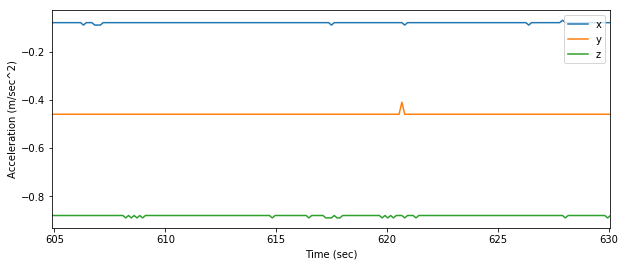

In [32]:
data = pd.read_csv('activity.csv')

#plot accelerometer data in all 3 directions
data.plot(x='t', figsize=(10,4))
plt.xlabel('Time (sec)'), 
plt.ylabel('Acceleration')

m = data['x']**2 + data['y']**2 + data['z']**2
magnitude = np.sqrt(m)
data['magnitude'] = magnitude
data['magnitude_zerod'] = data['magnitude'] - data['magnitude'].mean()

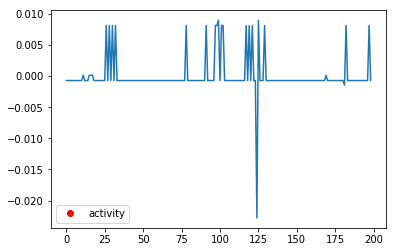

In [37]:
peaks_custom, _ = find_peaks(data['magnitude_zerod'], distance=1, threshold=.1, width=1)
plt.plot(peaks_custom, data['magnitude_zerod'].loc[peaks_custom], 'or')
plt.plot(data['magnitude_zerod'])
plt.legend([trial_name])

# MODULE #3
---
We've looked at detecting steps by changing some parameters of the peak-finding function in SciPy. Now it's time to pick your own activity and modify the peak-finding algorithm to work for you.

## STEP 1
Spend 2 minutes thinking of activities that might be interesting to detect with an accelerometer. At the end of the 2 minutes, you and your partner should agree on one activity to work on, and where the accelerometer should be to detect it.

Remember that your Arduino only has a 3-foot cable, so we're limited to things that keep it near your computer.

## STEP 2.1

Look at real data. 
- Use the code below to experiment with streaming data as you do your activity with the accelerometer where you think it belongs. 
- When you're satisfied that you have a signal that looks good, move on to the next step.

If you haven't gotten a signal that you think is reasonable after a few tries, you can consider switching to a different activity.

In [ ]:
df.hvplot(x='t', backlog=50, kind='scatter') * df.hvplot(x='t', backlog=50, kind='line')

In [ ]:
#for i in range(30): # Option 2: read 30 samples and then stop
while(True): #stream forever.  must use "Kernel" --> "Interrupt" to stop
    buffer = []
    for i in range(buffer_size):
        entries = unpack_serial_line(port.readline(), cols)
        if entries:
            buffer.append(entries)
    df_buffer = pd.DataFrame(buffer, columns=cols)
    df_buffer["t"] /= 1000.# convert from milliseconds to seconds
    df.emit(df_buffer)

## Step 2.2
Record real data. Use this code to record your activity in the way you found worked well in step 2.1.

In [ ]:
trial_name = 'activity' # Replace this with your activity name. Only use letters, numbers, and spaces.
num_samples = 200 # ~10-15 seconds
expected_cols = ['t','x','y','z']

# Note on collecting data:
# unplug / plug in arduino, or press reset button to reset buffer for each data trial
port = Serial(port=arduino_port, baudrate=arduino_baudrate)
port.flushInput()
port.flushOutput()

# Read data
t0 = time.time()
data = []
for n in range(num_samples): 
    entries = unpack_serial_line(port.readline(), expected_cols)
    if entries:
        data.append(entries)
print(f"Finished: {trial_name}\n"
      f"Collected {len(data)} samples in {time.time() - t0} seconds.")

# Convert raw data to dataframe, save as csv and plot
data = pd.DataFrame(data, columns=expected_cols)
data["t"] /= 1000.# convert from milliseconds to seconds
data = data.set_index('t')
csv_filename = f"{trial_name}.csv"
data.to_csv(csv_filename)
print(f"Saved csv file: {csv_filename}")
data.plot(figsize=(20, 5), title=trial_name)
plt.show()
data

## STEP 3
Load the data you just recorded and then tune the peak-finding parameters you learned in Module 2 until you're happy with how well it detects the activity. After this, you'll be sharing what activity you picked and what you discovered about detecting it with peak-finding.
- prominence, threshold, and width are already in the code for you to experiment with.
- Don't feel like you need to use all of them.

Pro tip: Think carefully about what you're seeing in the recorded data. 
- How far apart are the peaks? What's the value of the peaks? 
- Are there other peaks that you don't want to detect?

In [ ]:
data = pd.read_csv('activity.csv')

#plot accelerometer data in all 3 directions
data.plot(x='t', figsize=(10,4))
plt.xlabel('Time (sec)'), 
plt.ylabel('Acceleration')

In [ ]:
peaks_custom, _ = find_peaks(data['magnitude'], distance=1, threshold=.1, width=1)
plt.plot(peaks_custom, data['magnitude'].loc[peaks_custom], 'or')
plt.plot(data['magnitude'])
plt.legend([trial_name])

## EXTRA CREDIT
If you finished tuning your peak finding and still have time left, you can try again with a different activity. Save your peak-finding parameters first, though! 

For a challenge, maybe consider what happens if your activity mostly rotates the Arduino without other motion. Does simple peak finding work with 3D magnitude? Can you change the algorithm so it works better?